In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append('../../../aguacate-aljoan/')  # Adjust to the path where utils is located
from utils.data import obtener_nuevo_avocado

df_filtered = obtener_nuevo_avocado()

df_filtered = df_filtered.loc[df_filtered['region_type'] == 'GreaterRegion'].copy() #Si se quiere hacer el calculo por ciudad cambiar por city, sino GreateRegion

In [18]:
# Overview of the DataFrame
print(df_filtered.info())  # Column names, non-null counts, data types
print("\nShape:", df_filtered.shape)  # Number of rows and columns
print("\nFirst Few Rows:\n", df_filtered.head())  # First 5 rows
print("\nLast Few Rows:\n", df_filtered.tail())  # Last 5 rows

<class 'pandas.core.frame.DataFrame'>
Index: 2704 entries, 312 to 18236
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2704 non-null   int64  
 1   Date          2704 non-null   object 
 2   AveragePrice  2704 non-null   float64
 3   Total Volume  2704 non-null   float64
 4   4046          2704 non-null   float64
 5   4225          2704 non-null   float64
 6   4770          2704 non-null   float64
 7   Total Bags    2704 non-null   float64
 8   Small Bags    2704 non-null   float64
 9   Large Bags    2704 non-null   float64
 10  XLarge Bags   2704 non-null   float64
 11  type          2704 non-null   object 
 12  year          2704 non-null   int64  
 13  region        2704 non-null   object 
 14  region_type   2704 non-null   object 
dtypes: float64(9), int64(2), object(4)
memory usage: 338.0+ KB
None

Shape: (2704, 15)

First Few Rows:
      Unnamed: 0        Date  AveragePrice  Total Volume   

   quarter-year  AveragePrice  Total Volume
0       2015-Q1      1.303269  4.167143e+08
1       2015-Q2      1.344087  4.576087e+08
2       2015-Q3      1.408798  4.175385e+08
3       2015-Q4      1.313654  3.653937e+08
4       2016-Q1      1.200481  4.883719e+08
5       2016-Q2      1.193317  5.187357e+08
6       2016-Q3      1.375962  4.533826e+08
7       2016-Q4      1.443077  3.586689e+08
8       2017-Q1      1.231731  5.153125e+08
9       2017-Q2      1.444087  5.010321e+08
10      2017-Q3      1.665192  4.157885e+08
11      2017-Q4      1.528661  4.325604e+08
12      2018-Q1      1.323281  5.236323e+08


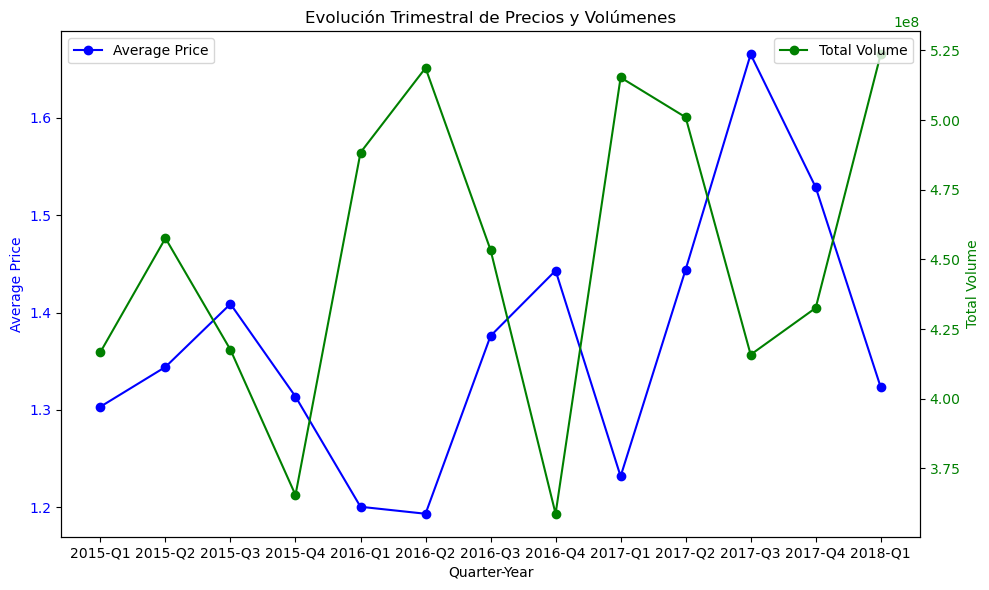

In [19]:
# Conversión de 'Date' a tipo datetime
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])


# Group by Quarter and calculate the average price and total volume
quarterly_cohort = df_filtered.groupby(pd.Grouper(key='Date', freq='QS')).agg({'AveragePrice': 'mean','Total Volume': 'sum'}).reset_index()

# Agregar una columna 'quarter-year' para mostrar year-quarter en el formato "YYYY-QX"
quarterly_cohort['quarter-year'] = quarterly_cohort['Date'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')

print(quarterly_cohort[['quarter-year', 'AveragePrice', 'Total Volume']])

# Visualizar los resultados en un gráfico de líneas
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar la evolución del precio promedio en el primer eje y usando quarter-year en el eje x
ax1.plot(quarterly_cohort['quarter-year'], quarterly_cohort['AveragePrice'], label='Average Price', color='blue', marker='o')
ax1.set_xlabel('Quarter-Year')
ax1.set_ylabel('Average Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para el volumen total
ax2 = ax1.twinx()
ax2.plot(quarterly_cohort['quarter-year'], quarterly_cohort['Total Volume'], label='Total Volume', color='green', marker='o')
ax2.set_ylabel('Total Volume', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Añadir título y leyenda
plt.title('Evolución Trimestral de Precios y Volúmenes')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotar etiquetas del eje x 45 grados para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

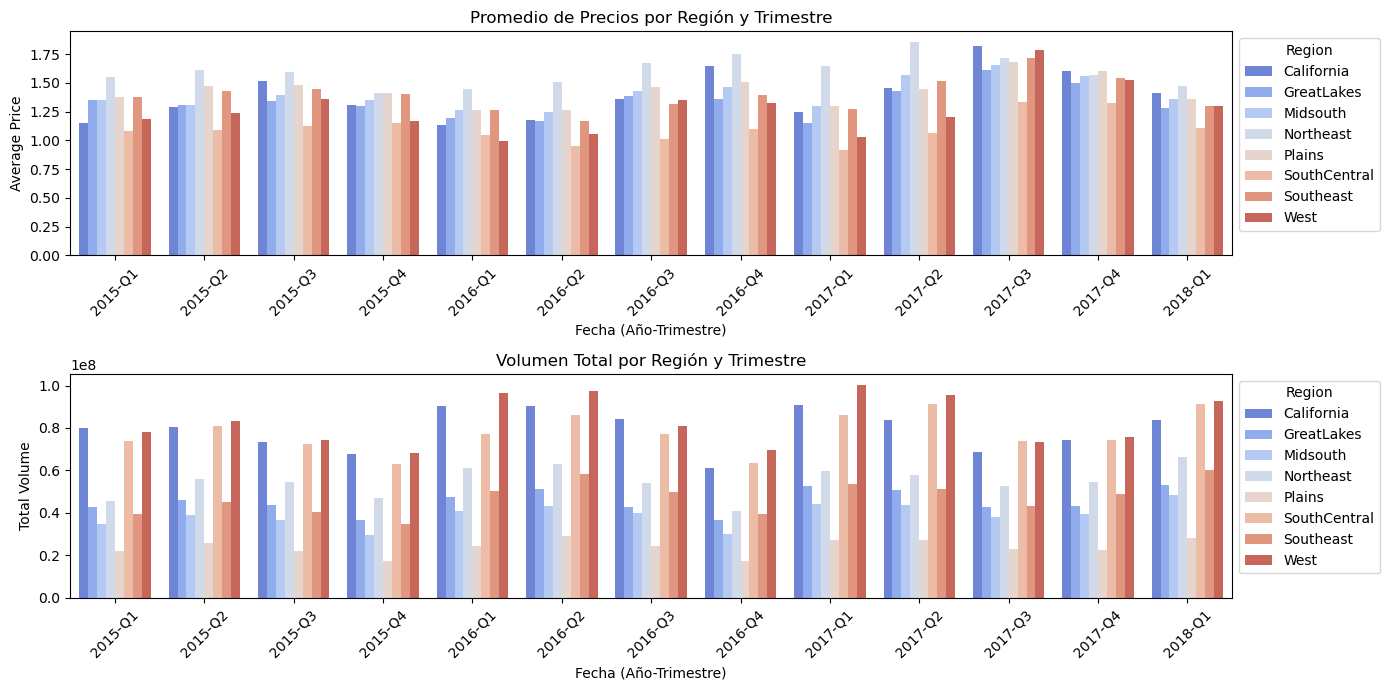

In [20]:
# Agrupar los datos por 'region' y 'Date', calculando el promedio de AveragePrice y la suma de Total Volume
cohort_region = df_filtered.groupby(['region', pd.Grouper(key='Date', freq='QE')]).agg({
    'AveragePrice': 'mean',
    'Total Volume': 'sum'
}).reset_index()

# Crear una columna 'quarter-year' para facilitar la visualización
cohort_region['quarter-year'] = cohort_region['Date'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')

# Configuración para la visualización
plt.figure(figsize=(14, 7))

# Gráfico de barras para Average Price por región
plt.subplot(2, 1, 1)
sns.barplot(data=cohort_region, x='quarter-year', y='AveragePrice', hue='region', palette='coolwarm')
plt.title('Promedio de Precios por Región y Trimestre')
plt.xlabel('Fecha (Año-Trimestre)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.tight_layout()

# Gráfico de barras para Total Volume por región
plt.subplot(2, 1, 2)
sns.barplot(data=cohort_region, x='quarter-year', y='Total Volume', hue='region', palette='coolwarm')
plt.title('Volumen Total por Región y Trimestre')
plt.xlabel('Fecha (Año-Trimestre)')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.tight_layout()

# Mostrar los gráficos
plt.show()



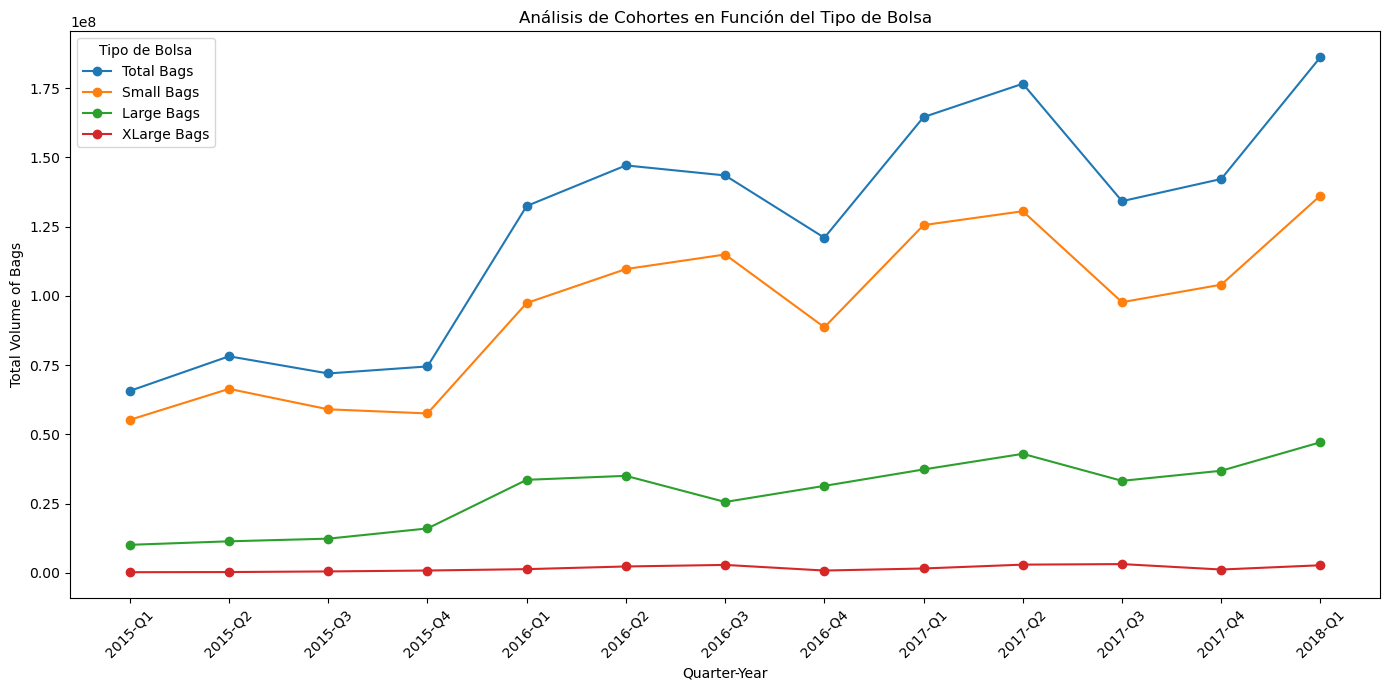

In [21]:
# Agrupar los datos por 'Date' y calcular la suma de Total Bags, Small Bags, Large Bags, y XLarge Bags
cohort_bags = df_filtered.groupby(pd.Grouper(key='Date', freq='QE')).agg({
    'Total Bags': 'sum',
    'Small Bags': 'sum',
    'Large Bags': 'sum',
    'XLarge Bags': 'sum'
}).reset_index()

# Crear una columna 'quarter-year' para facilitar la visualización
cohort_bags['quarter-year'] = cohort_bags['Date'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')

# Configuración para la visualización
plt.figure(figsize=(14, 7))

# Graficar Total Bags
plt.plot(cohort_bags['quarter-year'], cohort_bags['Total Bags'], label='Total Bags', marker='o')
# Graficar Small Bags
plt.plot(cohort_bags['quarter-year'], cohort_bags['Small Bags'], label='Small Bags', marker='o')
# Graficar Large Bags
plt.plot(cohort_bags['quarter-year'], cohort_bags['Large Bags'], label='Large Bags', marker='o')
# Graficar XLarge Bags
plt.plot(cohort_bags['quarter-year'], cohort_bags['XLarge Bags'], label='XLarge Bags', marker='o')

# Añadir título y etiquetas
plt.title('Análisis de Cohortes en Función del Tipo de Bolsa')
plt.xlabel('Quarter-Year')
plt.ylabel('Total Volume of Bags')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.legend(title='Tipo de Bolsa')
plt.tight_layout()  # Ajustar el diseño
plt.show()


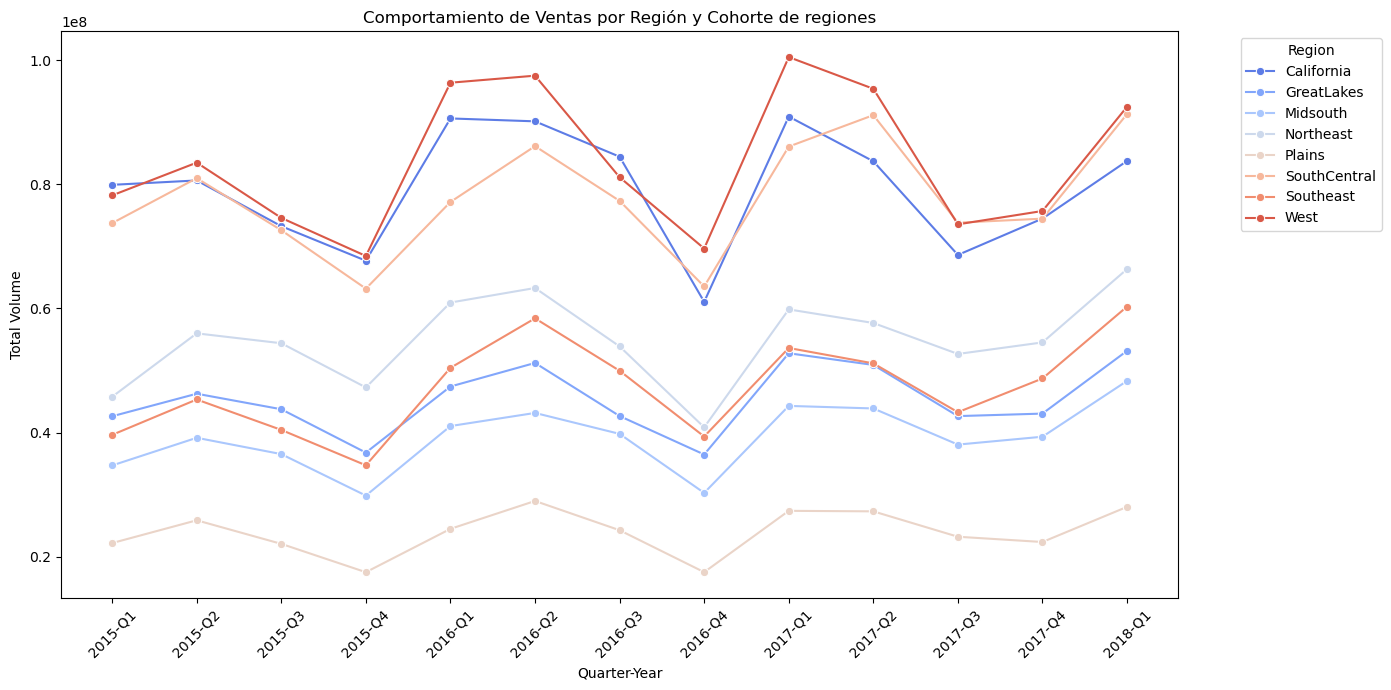

In [22]:
# Agrupar los datos por 'region' y 'Date', calculando el volumen total de ventas
cohort_sales_region = df_filtered.groupby(['region', pd.Grouper(key='Date', freq='QE')]).agg({
    'Total Volume': 'sum'
}).reset_index()

# Crear una columna 'quarter-year' para facilitar la visualización
cohort_sales_region['quarter-year'] = cohort_sales_region['Date'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')

# Configuración para la visualización
plt.figure(figsize=(14, 7))

# Gráfico de líneas para el volumen total de ventas por región
sns.lineplot(data=cohort_sales_region, x='quarter-year', y='Total Volume', hue='region', marker='o', palette='coolwarm')

# Configuración del gráfico
plt.title('Comportamiento de Ventas por Región y Cohorte de regiones')
plt.xlabel('Quarter-Year')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar leyenda fuera del gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()



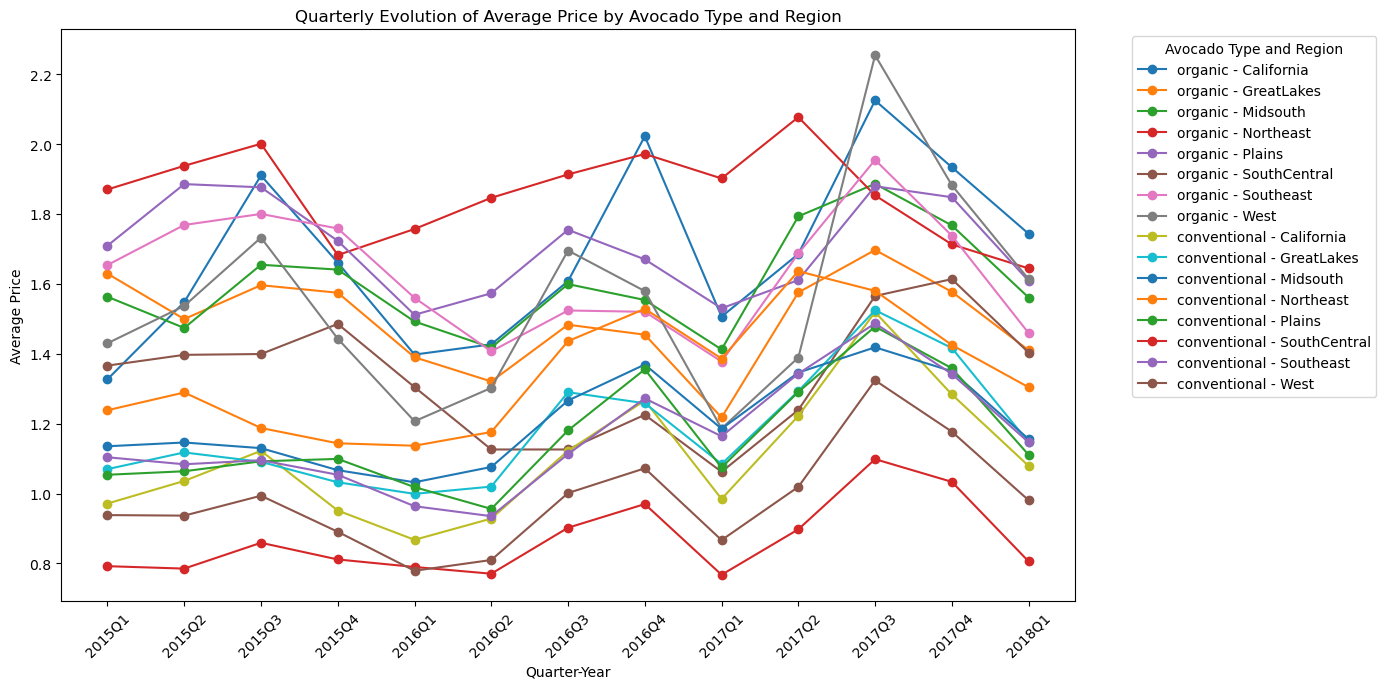

In [37]:
# Separate data by type
organic_df = df_filtered[df_filtered['type'] == 'organic'].copy()
conventional_df = df_filtered[df_filtered['type'] == 'conventional'].copy()

# Create an empty DataFrame to store the data
price_evolution_df = pd.DataFrame()

# Process each type separately
for df, avocado_type in [(organic_df, 'organic'), (conventional_df, 'conventional')]:
    # Group by quarter and region, calculate the average price per quarter
    quarterly_data = df.groupby([pd.Grouper(key='Date', freq='QS'), 'region'])['AveragePrice'].mean().reset_index()
    
    # Convert the quarter to `quarter-year` in YYYY-Q# format
    quarterly_data['quarter-year'] = quarterly_data['Date'].dt.to_period('Q').astype(str)
    
    # Add the avocado type as a column
    quarterly_data['Type'] = avocado_type
    
    # Append to price_evolution_df
    price_evolution_df = pd.concat([price_evolution_df, quarterly_data])

# Plot quarterly average prices for each type and region
plt.figure(figsize=(14, 7))
for avocado_type in price_evolution_df['Type'].unique():
    subset_type = price_evolution_df[price_evolution_df['Type'] == avocado_type]
    for region in subset_type['region'].unique():
        subset_region = subset_type[subset_type['region'] == region]
        plt.plot(subset_region['quarter-year'], subset_region['AveragePrice'], marker='o', label=f'{avocado_type} - {region}')

# Customize plot
plt.title('Quarterly Evolution of Average Price by Avocado Type and Region')
plt.xlabel('Quarter-Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Avocado Type and Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


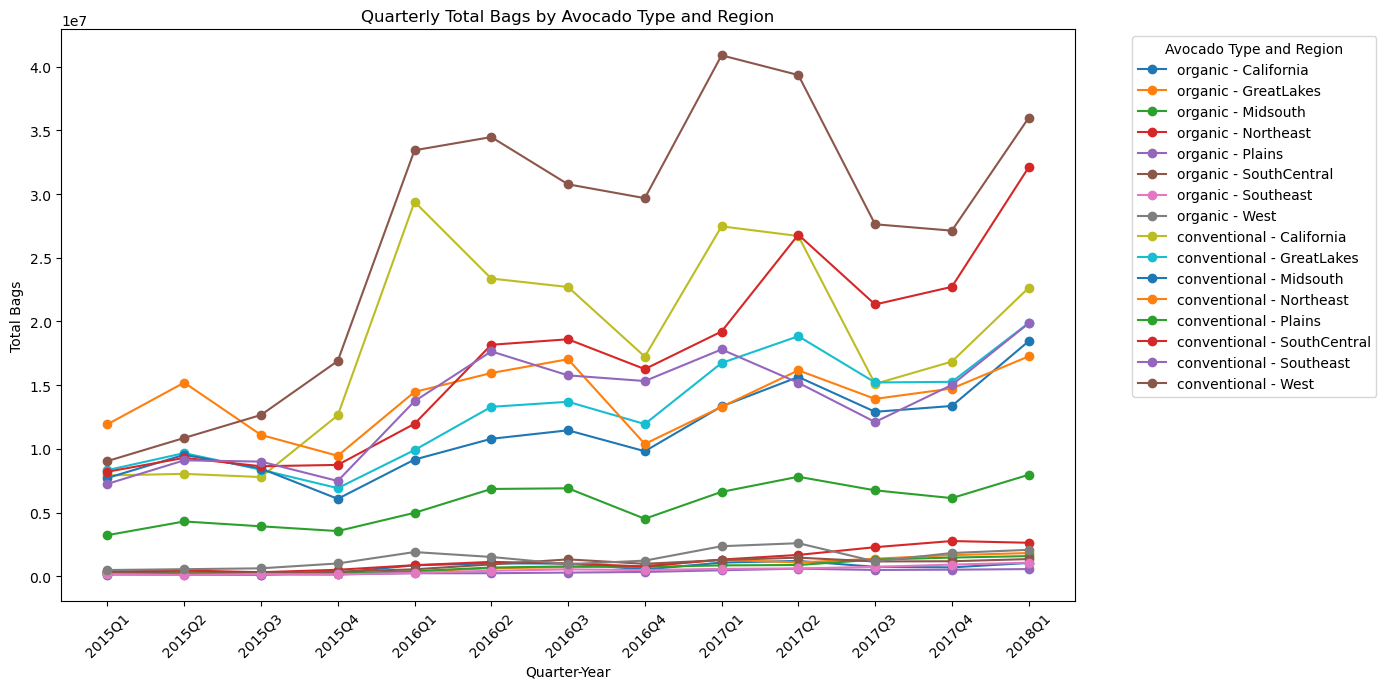

In [40]:
# Separate data by type
organic_df = df_filtered[df_filtered['type'] == 'organic'].copy()
conventional_df = df_filtered[df_filtered['type'] == 'conventional'].copy()

# Create an empty DataFrame to store the data
bags_evolution_df = pd.DataFrame()

# Process each type separately
for df, avocado_type in [(organic_df, 'organic'), (conventional_df, 'conventional')]:
    # Group by quarter and region, calculate the sum of total bags per quarter
    quarterly_data = df.groupby([pd.Grouper(key='Date', freq='QS'), 'region']).agg({
        'Total Bags': 'sum',
        'Total Volume': 'sum'
    }).reset_index()
    
    # Convert the quarter to `quarter-year` in YYYY-Q# format
    quarterly_data['quarter-year'] = quarterly_data['Date'].dt.to_period('Q').astype(str)
    
    # Add the avocado type as a column
    quarterly_data['Type'] = avocado_type
    
    # Append to bags_evolution_df
    bags_evolution_df = pd.concat([bags_evolution_df, quarterly_data])

# Plot quarterly total bags for all entries
plt.figure(figsize=(14, 7))
for avocado_type in bags_evolution_df['Type'].unique():
    subset_type = bags_evolution_df[bags_evolution_df['Type'] == avocado_type]
    for region in subset_type['region'].unique():
        subset_region = subset_type[subset_type['region'] == region]
        plt.plot(subset_region['quarter-year'], subset_region['Total Bags'], marker='o', label=f'{avocado_type} - {region}')

# Customize plot
plt.title('Quarterly Total Bags by Avocado Type and Region')
plt.xlabel('Quarter-Year')
plt.ylabel('Total Bags')
plt.xticks(rotation=45)
plt.legend(title='Avocado Type and Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()